In [22]:
# Jayson

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Learning Curves

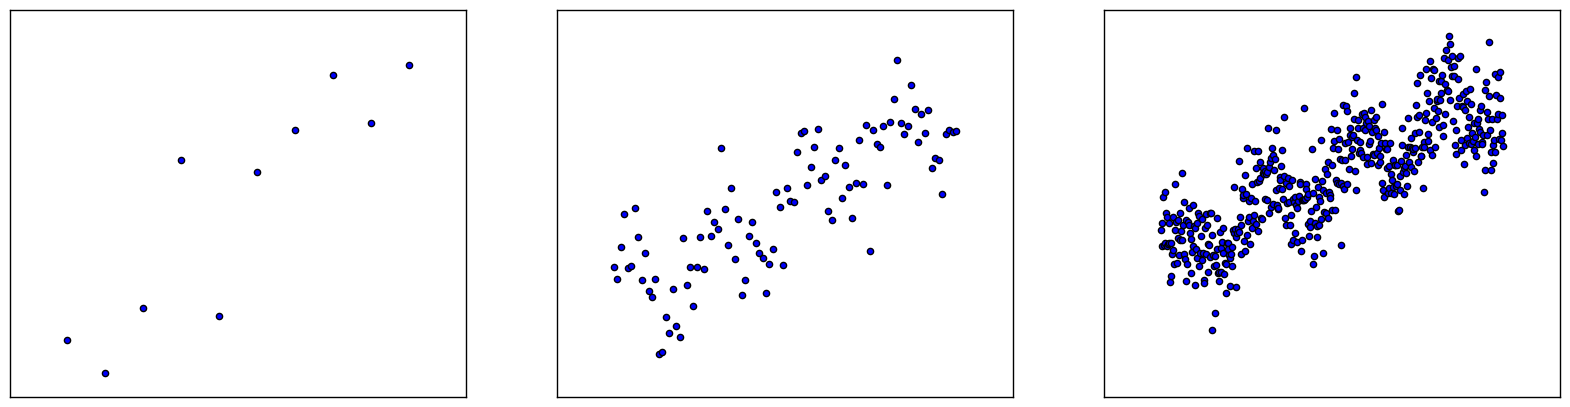

In [2]:
from figures import make_dataset

fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for n_samples, ax in zip([10, 100, 500], axes.ravel()):
    X, y = make_dataset(n_samples=n_samples)
    ax.scatter(X, y)
    ax.set_xticks(())
    ax.set_yticks(())

When choosing your model, it is helpful to know how to the model reacts to having more or less data. To understand this, we use the **learning_curve**

- We select a subset of the data, and see how it performs. 
- Increase the amount of data selected iteraveley and visualize the performance

In [11]:
from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import KFold
from sklearn.linear_model import Ridge

from sklearn.datasets import load_boston
boston = load_boston()
# print(boston.DESCR) to learn more about the dataset

cv = KFold(n_folds=10, n=len(boston.data), shuffle=True)
train_sizes, train_scores, validation_scores = learning_curve(Ridge(alpha=1), boston.data, boston.target,
                                                              cv=cv)
print("dataset size: %d" % boston.data.shape[0])
print("training set sizes: %s" % train_sizes)

dataset size: 506
training set sizes: [ 45 147 250 352 455]


In [20]:
# 5 Different training set sizes
# 10 Splits, because we use 10-fold cross validation
train_scores.shape

(5, 10)

In [21]:
# Helper Function for plotting.
# Compute the mean and standard deviation over the cross validation folds

def plot_learning_curve(train_sizes, train_scores, validation_scores):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", 
             label="Cross-validation score")
    plt.ylim(max(-3, validation_scores_mean.min() - .1), train_scores_mean.max() + .1)

For small training set sizes, the training score is high, the test score is low - This means we're overfitting.

Increasing the training set size, the test set score increases. This tells us that collecting more data will not help.

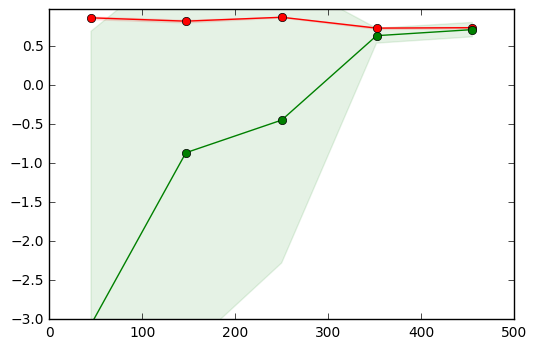

In [14]:
plot_learning_curve(train_sizes, train_scores, validation_scores)

When using a smaller alpha, you can see that there is even more overfitting!

Training (red) and Test (green) are even more apart

In [15]:
train_sizes, train_scores, validation_scores = learning_curve(Ridge(alpha=0.001), boston.data, boston.target,
                                                              cv=cv)

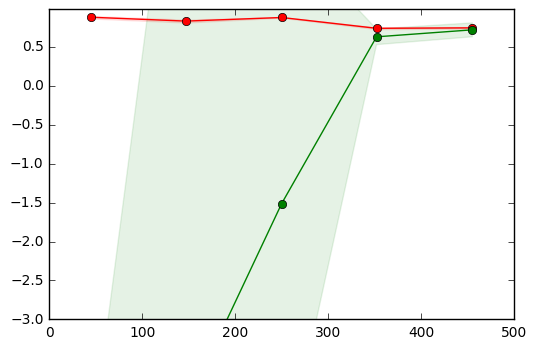

In [16]:
plot_learning_curve(train_sizes, train_scores, validation_scores)